# Keras practice

### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
from keras import layers

import keras
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


## IMDB 

### Prepare data

In [71]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [25]:
word_index = imdb.get_word_index()

In [37]:
# Decode review
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])


In [26]:
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i][j] = 1.
    return results 


In [27]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [29]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

### Build the model

In [32]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    #layers.Dense(50, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [33]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.summary()

In [34]:
history = model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/4
30/30 [==============================] - 3s 44ms/step - loss: 0.5275 - accuracy: 0.7815 - val_loss: 0.4084 - val_accuracy: 0.8496
Epoch 2/4
30/30 [==============================] - 1s 21ms/step - loss: 0.3191 - accuracy: 0.8965 - val_loss: 0.3069 - val_accuracy: 0.8901
Epoch 3/4
30/30 [==============================] - 1s 22ms/step - loss: 0.2299 - accuracy: 0.9271 - val_loss: 0.3022 - val_accuracy: 0.8791
Epoch 4/4
30/30 [==============================] - 1s 21ms/step - loss: 0.1828 - accuracy: 0.9413 - val_loss: 0.2828 - val_accuracy: 0.8858


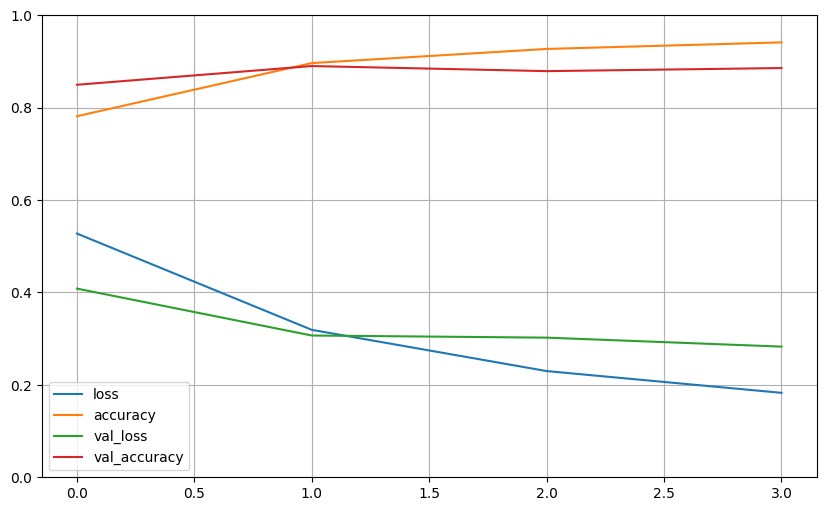

In [35]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Evaluation

In [36]:
model.evaluate(x_test, y_test, batch_size=128)

196/196 [==============================] - 1s 5ms/step - loss: 0.3002 - accuracy: 0.8792


[0.3001853823661804, 0.8792399764060974]

#### Confusion matrix

In [61]:
y_prob = model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


In [66]:
(y_prob > 0.5)  == (y_test > 0.5)

array([[ True, False, False, ...,  True,  True,  True],
       [False,  True,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       ...,
       [ True, False, False, ...,  True,  True,  True],
       [ True, False, False, ...,  True,  True,  True],
       [False,  True,  True, ..., False, False, False]])

In [67]:
y_prob = model.predict(x_test)
y_classes = y_prob > 0.5

confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

782/782 [==============================] - 2s 3ms/step


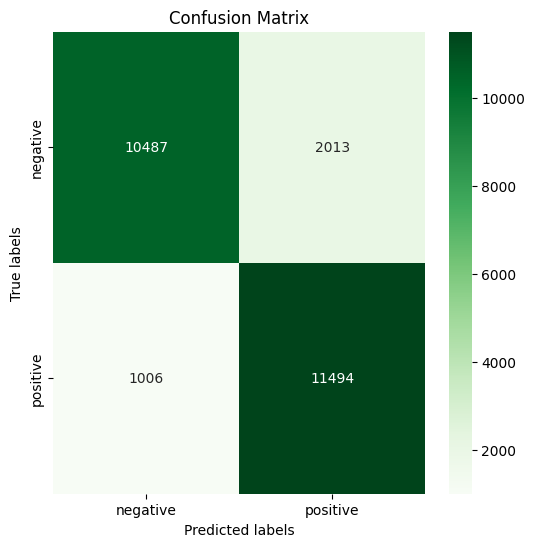

In [69]:
import seaborn as sb


fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  #annot=True to annotate cells, ftm='g' to disable scientific notation
class_names = ["negative", "positive" ]
# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names) 
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(6, 6)

plt.show()

confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)## Reuters 

## Reuters

### Prepare data

In [85]:
from keras.datasets import reuters
from keras.utils import to_categorical 

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


In [ ]:
train_data[10]

In [ ]:
# Decode review
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review


In [81]:
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i][j] = 1.
    return results 


In [82]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [86]:
y_train = to_categorical(train_labels)
y_test =  to_categorical(test_labels)

In [87]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

### Build the model

In [118]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [119]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [122]:
history = model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512,
    validation_split=0.1
)

Epoch 1/9
16/16 [==============================] - 1s 38ms/step - loss: 0.2237 - accuracy: 0.9462 - val_loss: 0.2605 - val_accuracy: 0.9377
Epoch 2/9
16/16 [==============================] - 0s 20ms/step - loss: 0.1950 - accuracy: 0.9515 - val_loss: 0.2832 - val_accuracy: 0.9288
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 0.1720 - accuracy: 0.9545 - val_loss: 0.3097 - val_accuracy: 0.9244
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.1562 - accuracy: 0.9558 - val_loss: 0.3234 - val_accuracy: 0.9155
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.1449 - accuracy: 0.9576 - val_loss: 0.3490 - val_accuracy: 0.9166
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.1350 - accuracy: 0.9572 - val_loss: 0.3813 - val_accuracy: 0.9099
Epoch 7/9
16/16 [==============================] - 0s 17ms/step - loss: 0.1246 - accuracy: 0.9587 - val_loss: 0.3763 - val_accuracy: 0.9121
Epoch 8/9
16/16 [===

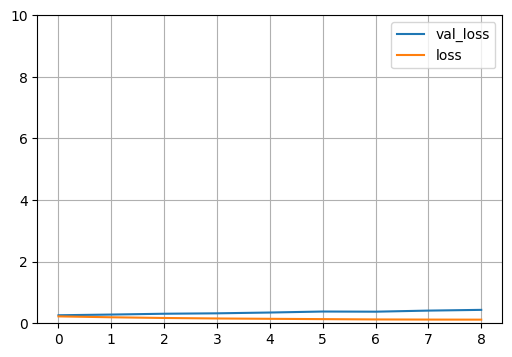

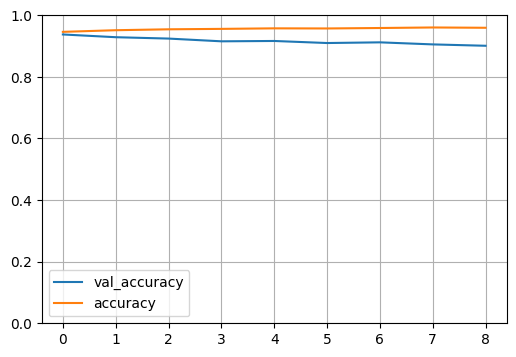

In [123]:
pd.DataFrame(history.history)[["val_loss", "loss"]].plot(figsize=(6,4))
plt.grid(True)
plt.gca().set_ylim(0,10)
plt.show()

pd.DataFrame(history.history)[["val_accuracy", "accuracy"]].plot(figsize=(6,4))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Evaluation

In [124]:
model.evaluate(x_test, y_test, batch_size=128)

18/18 [==============================] - 0s 12ms/step - loss: 1.1544 - accuracy: 0.7907


[1.1543506383895874, 0.790739119052887]